<a href="https://colab.research.google.com/github/Abdulla-creator-coder/Test-project/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/AI/PRAICP-1004-RainfallTS.zip"
extract_path = "/content/rainfall_data"

# Create extraction folder
os.makedirs(extract_path, exist_ok=True)

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Completed!")

Extraction Completed!


In [ ]:
import pandas as pd

# Load datasets
df_total = pd.read_csv("/content/rainfall_data/Data/rainfall-monthly-total.csv")
df_max = pd.read_csv("/content/rainfall_data/Data/rainfall-monthly-highest-daily-total.csv")

print(df_total.head())
print(df_max.head())

     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2
     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0


In [ ]:
df_total['month'] = pd.to_datetime(df_total['month'])
df_total.set_index('month', inplace=True)

df_max['month'] = pd.to_datetime(df_max['month'])
df_max.set_index('month', inplace=True)

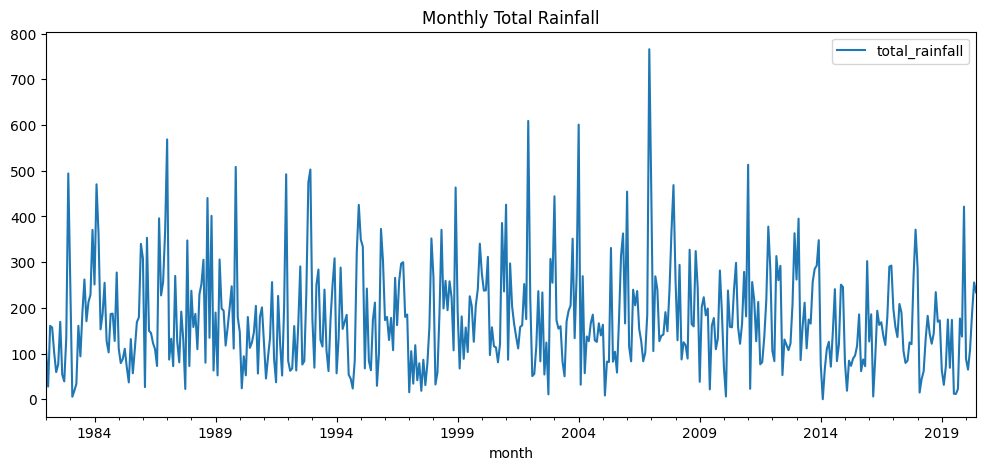

In [ ]:
import matplotlib.pyplot as plt

df_total.plot(figsize=(12,5))
plt.title("Monthly Total Rainfall")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_total,
                order=(1,1,1),
                seasonal_order=(1,1,1,12))

results = model.fit()

forecast = results.forecast(steps=12)
print(forecast)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2020-07-01    143.403851
2020-08-01    134.396695
2020-09-01    132.490290
2020-10-01    155.790995
2020-11-01    242.505843
2020-12-01    316.828780
2021-01-01    211.675236
2021-02-01     95.977523
2021-03-01    150.894392
2021-04-01    148.499945
2021-05-01    164.233765
2021-06-01    133.247495
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
model_max = SARIMAX(df_max,
                    order=(1,1,1),
                    seasonal_order=(1,1,1,12))

results_max = model_max.fit()

forecast_max = results_max.forecast(steps=12)
print(forecast_max)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2020-07-01    28.872135
2020-08-01    36.649905
2020-09-01    33.224932
2020-10-01    35.525068
2020-11-01    60.206500
2020-12-01    69.604036
2021-01-01    62.290679
2021-02-01    27.404493
2021-03-01    37.017743
2021-04-01    35.345629
2021-05-01    38.077797
2021-06-01    32.844012
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = df_total.reset_index()
df_prophet.columns = ['ds','y']

model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast_prophet = model_prophet.predict(future)

forecast_prophet[['ds','yhat']].tail(12)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat
462,2020-06-30,131.801056
463,2020-07-31,162.760328
464,2020-08-31,100.315014
465,2020-09-30,122.949264
466,2020-10-31,188.531777
467,2020-11-30,334.279189
468,2020-12-31,233.805004
469,2021-01-31,106.113169
470,2021-02-28,63.275047
471,2021-03-31,122.963107


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
train = df_total[:-12]
test = df_total[-12:]

forecast = results.forecast(steps=12)

mae = mean_absolute_error(test, forecast)
print("MAE:", mae)

MAE: 85.17023760168684
